**RUN THIS CELL BEFORE DOING ANYTHING ELSE:**

In [ ]:
!pip3 install --upgrade git+https://github.com/ptgodart/nasaPoly.git
%matplotlib inline

  Cloning https://github.com/ptgodart/nasaPoly.git to /tmp/pip-req-build-92l6jfer
  Running command git clone -q https://github.com/ptgodart/nasaPoly.git /tmp/pip-req-build-92l6jfer
  Created wheel for nasaPoly: filename=nasaPoly-0.0.1-cp37-none-any.whl size=275527 sha256=63e18055c256c9d2ca4aacf699649e2172a3091e57e364b2b40e794221a837b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-pqxg7y9_/wheels/80/e8/7d/86c2617f0cd25f41d9ba27d947b2e6de9e9c2e6852492b837e
Successfully built nasaPoly


In [ ]:
import nasaPoly

mgwhatever = nasaPoly.Species('Mg2SiO4(L)')
print(mgwhatever)


Species: Mg2SiO4(L)
Phase: Check source
Data Source: 
Molecular wt: 140.6931 g/mol
Valid temperature range(s): (2171.0, 5000.0)



# Problem Set 2 - Solutions

Thermodynamics and Climate Change

## Problem 4: Exploring Heat Capacity

## Part a:

(enter solutions below)

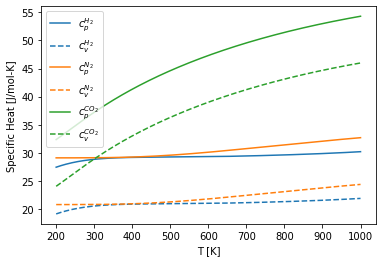

In [ ]:
import nasaPoly # for thermodynamic functions
from matplotlib import pyplot as plt # for plotting
import numpy as np # for general math stuff

# Enter solutions below:
# Create class instances for each molecule:
H2 = nasaPoly.Species('H2')
N2 = nasaPoly.Species('N2')
CO2 = nasaPoly.Species('CO2')

# Define temperature range and other constants
T_range = np.linspace(200, 1000, 250) # K
R = 8.314 # J/mol-K

# Compute cv and cp for each molecule
cp_H2_range = [H2.cp_0(T) for T in T_range] # List comprehension
cv_H2_range = [H2.cp_0(T) - R for T in T_range]
cp_N2_range = [N2.cp_0(T) for T in T_range]
cv_N2_range = [N2.cp_0(T) - R for T in T_range]
cp_CO2_range = [CO2.cp_0(T) for T in T_range]
cv_CO2_range = [CO2.cp_0(T) - R for T in T_range]

plt.plot(T_range, cp_H2_range, '-', color='tab:blue', label='$c_p^{H_2}$')
plt.plot(T_range, cv_H2_range, '--', color='tab:blue', label='$c_v^{H_2}$')
plt.plot(T_range, cp_N2_range, '-', color='tab:orange', label='$c_p^{N_2}$')
plt.plot(T_range, cv_N2_range, '--', color='tab:orange', label='$c_v^{N_2}$')
plt.plot(T_range, cp_CO2_range, '-', color='tab:green', label='$c_p^{CO_2}$')
plt.plot(T_range, cv_CO2_range, '--', color='tab:green', label='$c_v^{CO_2}$')
plt.xlabel('T [K]')
plt.ylabel('Specific Heat [J/mol-K]')
plt.legend()

plt.show()

## Part b:

In [ ]:
from scipy.integrate import quad

# Enter solutions below:
# (hint: you can integrate functions using quad(func, lower_bound, upper_bound))

T_lower = [200, 800] # K
T_upper = [300, 900] # K

for T_l, T_u in zip(T_lower, T_upper):
  Delta_Q_H2_p = quad(H2.cp_0, T_l, T_u)[0]
  Delta_Q_H2_v = quad(lambda T: H2.cp_0(T) - R, T_l, T_u)[0]
  Delta_Q_N2_p = quad(N2.cp_0, T_l, T_u)[0]
  Delta_Q_N2_v = quad(lambda T: N2.cp_0(T) - R, T_l, T_u)[0]
  Delta_Q_CO2_p = quad(CO2.cp_0, T_l, T_u)[0]
  Delta_Q_CO2_v = quad(lambda T: CO2.cp_0(T) - R, T_l, T_u)[0]

  print(f'Temperature Range, {T_l}-{T_u} K:')
  print(f'H2: Delta_q at constant pressure = {Delta_Q_H2_p:0.3g} J/mol')
  print(f'H2: Delta_q at constant volume = {Delta_Q_H2_v:0.3g} J/mol')
  print(f'N2: Delta_q at constant pressure = {Delta_Q_N2_p:0.3g} J/mol')
  print(f'N2: Delta_q at constant volume = {Delta_Q_N2_v:0.3g} J/mol')
  print(f'CO2: Delta_q at constant pressure = {Delta_Q_CO2_p:0.3g} J/mol')
  print(f'CO2: Delta_q at constant volume = {Delta_Q_CO2_v:0.3g} J/mol')
  print('\n')

Temperature Range, 200-300 K:
H2: Delta_q at constant pressure = 2.83e+03 J/mol
H2: Delta_q at constant volume = 2e+03 J/mol
N2: Delta_q at constant pressure = 2.91e+03 J/mol
N2: Delta_q at constant volume = 2.08e+03 J/mol
CO2: Delta_q at constant pressure = 3.48e+03 J/mol
CO2: Delta_q at constant volume = 2.65e+03 J/mol


Temperature Range, 800-900 K:
H2: Delta_q at constant pressure = 2.97e+03 J/mol
H2: Delta_q at constant volume = 2.14e+03 J/mol
N2: Delta_q at constant pressure = 3.18e+03 J/mol
N2: Delta_q at constant volume = 2.35e+03 J/mol
CO2: Delta_q at constant pressure = 5.22e+03 J/mol
CO2: Delta_q at constant volume = 4.39e+03 J/mol




## Part c:

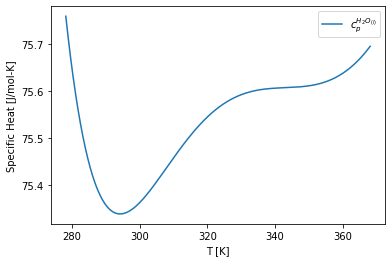

In [ ]:
# Enter solutions below:
# *liquid* H2O:
H2O_l = nasaPoly.Species('H2O(L)')

T_H2O_l_range = np.linspace(5+273.15, 95+273.15, 250)
cp_H2O_l_range = [H2O_l.cp_0(T) for T in T_H2O_l_range]

plt.plot(T_H2O_l_range, cp_H2O_l_range, label='$c_p^{H_2O_{(l)}}$')
plt.xlabel('T [K]')
plt.ylabel('Specific Heat [J/mol-K]')
plt.legend()

plt.show()

## Part d:

In [ ]:
# Enter solutions below:
# Same as part b, but just for constant pressure
T_lower_d = [5+273.15, 90+273.15] # K
T_upper_d = [10+273.15, 95+273.15] # K

for T_l, T_u in zip(T_lower_d, T_upper_d):
  Delta_Q_H2O_p = quad(H2O_l.cp_0, T_l, T_u)[0]

  print(f'{T_l - 273.15}-{T_u - 273.15} degC:')
  print(f'H2O: Delta_Q at constant pressure = {Delta_Q_H2O_p:0.4g} J/mol')
  print('\n')

5.0-10.0 degC:
H2O: Delta_Q at constant pressure = 378.1 J/mol


90.0-95.0 degC:
H2O: Delta_Q at constant pressure = 378.4 J/mol




# Problem 5 (Challenge): Adiabatic Flame Temperature

### Part i: Carbon in pure O2

Carbon and oxygen react by the following stoichiometry:

$C + O_2 \rightarrow CO_2$

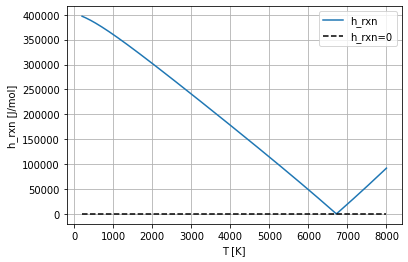

In [ ]:
# Enter solutions below:
# Create class instances for C and O2:
C = nasaPoly.Species('C(gr)') # for graphite
O2 = nasaPoly.Species('O2')

# Define delta h of reaction h_products(T_final) - h_reactants(T_initial)
# where T_final is the adiabatic flame temperature
def h_rxn_i(T_final, T_initial):
  return np.abs(CO2.h_0(T_final) - (C.h_0(T_initial) + O2.h_0(T_initial)))

# Let's plot to see what this looks like. Remember, to find the adiabatic flame
# tempereature we need to find where the h_reactants = h_products, or where
# h_rxn_i = 0:
T_i = 300 # K
T_sweep = np.linspace(200, 8000, 250)
plt.plot(T_sweep, [h_rxn_i(T, T_i) for T in T_sweep], label='h_rxn')
plt.plot([T_sweep[0], T_sweep[-1]], [0, 0], '--', color='black', label='h_rxn=0')
plt.xlabel('T [K]')
plt.ylabel('h_rxn [J/mol]')
plt.grid()
plt.legend()
plt.show()

Great! There is a clear minimum. We can find this corresponding temperature value, which is the adiabatic flame temperature, using scipy minimization function:

In [ ]:
from scipy.optimize import fminbound

T_final_i = fminbound(h_rxn_i, 200, 10000, args=(T_i,))
print(f'Adiabatic flame temperature in pure O2: {T_final_i:0.4g} K')

Adiabatic flame temperature in pure O2: 6718 K


Let's plot this point on our previous curve:

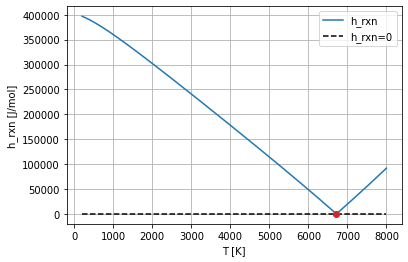

In [ ]:
T_i = 300 # K
T_sweep = np.linspace(200, 8000, 250)
plt.plot(T_sweep, [h_rxn_i(T, T_i) for T in T_sweep], label='h_rxn')
plt.plot([T_sweep[0], T_sweep[-1]], [0, 0], '--', color='black', label='h_rxn=0')
plt.plot([T_final_i], [h_rxn_i(T_final_i, T_i)], 'o', color='tab:red')
plt.xlabel('T [K]')
plt.ylabel('h_rxn [J/mol]')
plt.grid()
plt.legend()
plt.show()

Exactly where we expect. Great!

### Part ii: Carbon in air

Carbon and air react by the following stoichiometry:

$C + (O_2 + 3.773 N_2) \rightarrow CO_2 + 3.772 N_2$

In [ ]:
# Just as before:
def h_rxn_ii(T_final, T_initial):
  return np.abs((CO2.h_0(T_final) + 3.773*N2.h_0(T_final)) - (C.h_0(T_initial) + O2.h_0(T_initial) + 3.773*N2.h_0(T_initial)))

T_final_ii = fminbound(h_rxn_ii, 200, 5000, args=(T_i,))
print(f'Adiabatic flame temperature in air: {T_final_ii:0.4g} K')

Adiabatic flame temperature in air: 2458 K


This difference is due to the fact that in air, the inert nitrogen absorbs some thermal energy.